## Travel Package Purchase Prediction
**Author**: Aidos Utegulov<br />
**Cohort**: Feb 21

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

### Data Dictionary

**Customer details**:

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

**Customer interaction data**: 

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

### Import necessary libraries

In [1]:
!pip3 install xgboost

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_excel("Tourism.xlsx", sheet_name="Tourism")

### View the first and last 5 rows of the dataset.

In [4]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
df.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


### Understand the shape of the dataset.

In [6]:
df.shape

(4888, 20)

### Check the data types of the columns for the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Check null values

In [8]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

**Observations -**
* Dataset has 4888 rows and 20 columns
* 251 rows have a null value in the DurationOfPitch column, 233 rows have a null value in MonthlyIncome column, 225 in the Age column, 140 rows in the NumberOfTrips column, others have insignificant amount of null values
* We can convert the object type columns to categories.

`converting "objects" to "category" reduces the data space required to store the dataframe`

### Fixing the data types

In [9]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [10]:
for i in cols.columns:
    df[i] = df[i].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   int64   
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   float64 
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

### Summary of the dataset.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


**Observations**
- CustomerID column can be droped
- Age range is between 18 and 61. Mean and median are almost equal so the data does not appear skewed, this will be determined later
- 

In [13]:
df = df.drop("CustomerID", axis = 1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   int64 

In [15]:
cols_cat= df.select_dtypes(['category'])

**Let's look at the unqiue values of all the categories**

In [16]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in Designation are :
Executiv

## EDA

### Univariate analysis

In [17]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [18]:
cols = df.columns

In [19]:
print(cols)

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')


### Percentages of Categorical data on bar charts

In [20]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

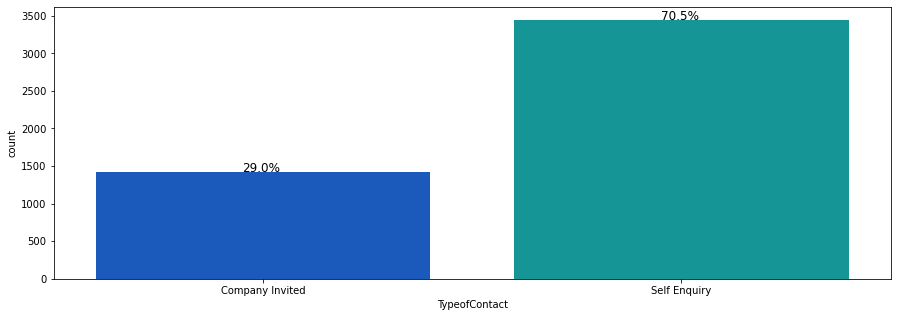

In [21]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['TypeofContact'],palette='winter')
perc_on_bar(ax,df['TypeofContact'])

**Observations**
- Most of the people have 'Self Enquiry' category in TypeofContract feature

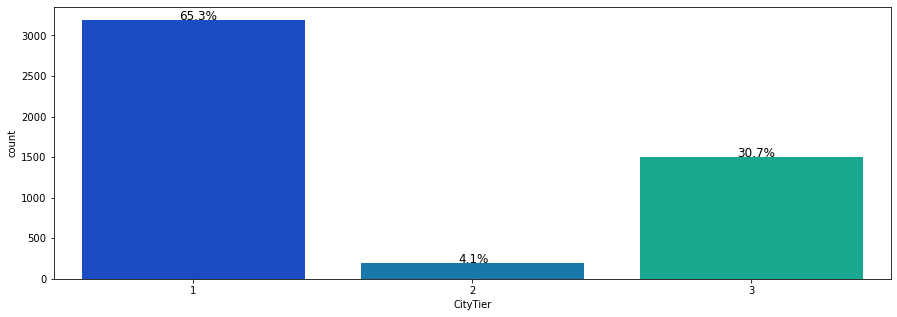

In [22]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['CityTier'],palette='winter')
perc_on_bar(ax,df['CityTier'])

**Observations**
- Most people have 'Tier 1' in the CityTier feature
- Very small number of people have "Tier 2' in the CityTier feature

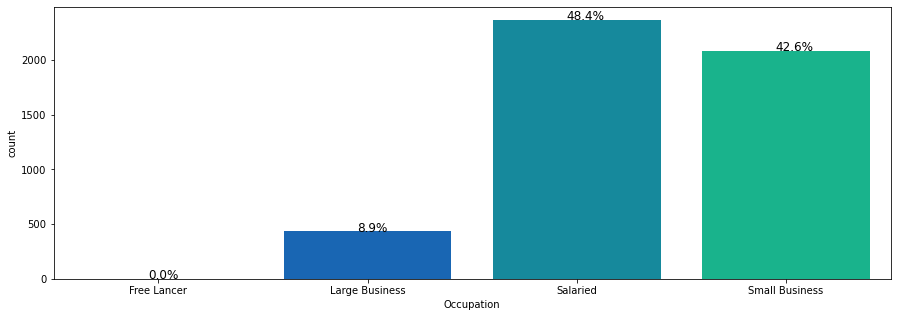

In [23]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['Occupation'],palette='winter')
perc_on_bar(ax,df['Occupation'])

**Observations**
- Almost half of people are salaried employees
- A considerable amount of Small Businesses in the column

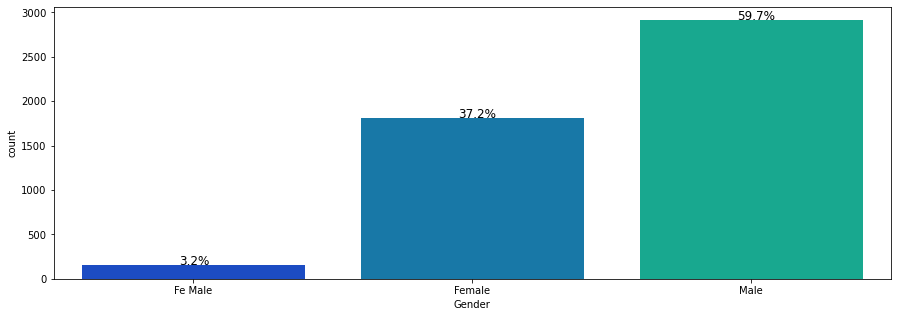

In [24]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['Gender'],palette='winter')
perc_on_bar(ax,df['Gender'])

**Observations**:
- This is the first candidate for data preprocessing: we need to add all Fe Male values to Female Gender
- We will do this later in the data preprocessing section

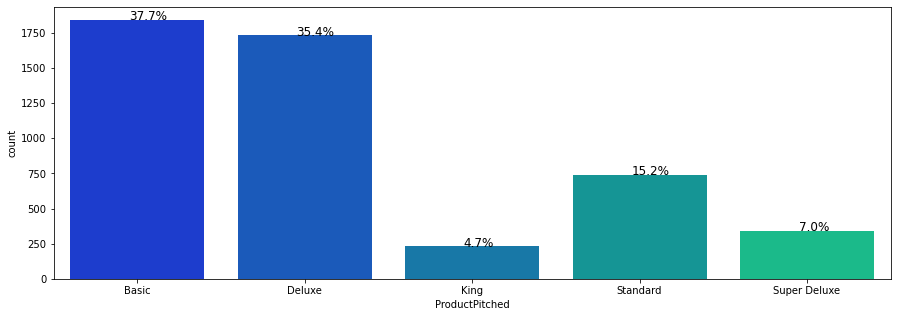

In [25]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['ProductPitched'],palette='winter')
perc_on_bar(ax,df['ProductPitched'])

**Observations**
- Most of the products pitched are basic and deluxe
- Very small amount of KingProductPitched category

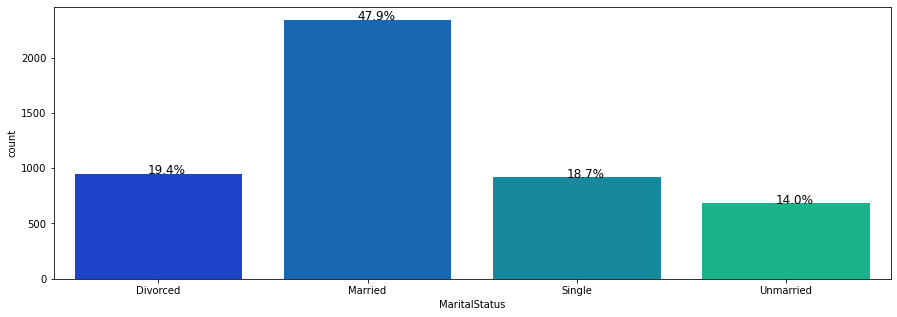

In [26]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['MaritalStatus'],palette='winter')
perc_on_bar(ax,df['MaritalStatus'])

**Observations**
- Most of the people are married
- a considerable portion of people are either divorced or single

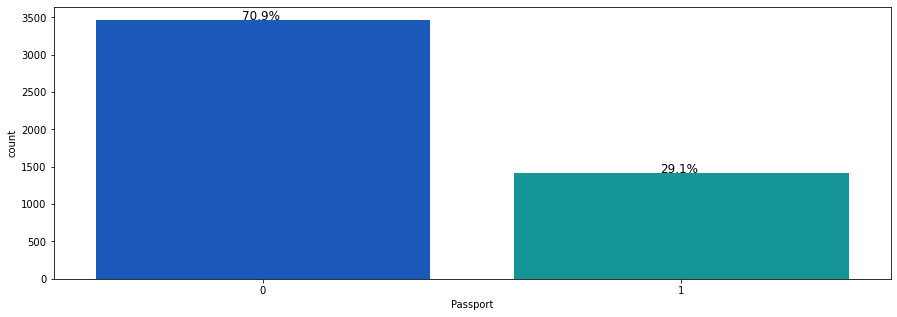

In [27]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['Passport'],palette='winter')
perc_on_bar(ax,df['Passport'])

- Most of people didn't have passports

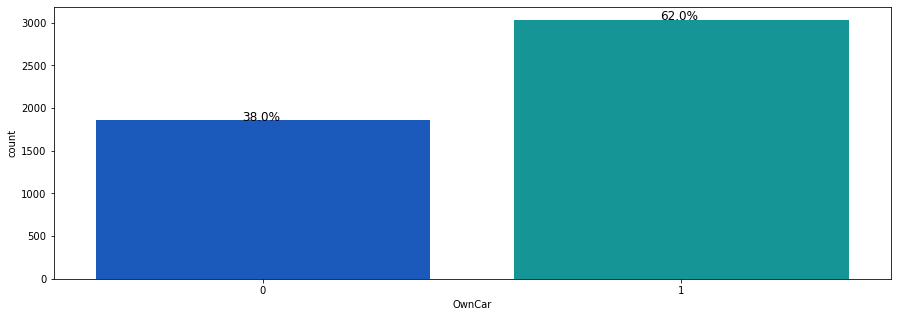

In [28]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['OwnCar'],palette='winter')
perc_on_bar(ax,df['OwnCar'])

- Most of people own cars

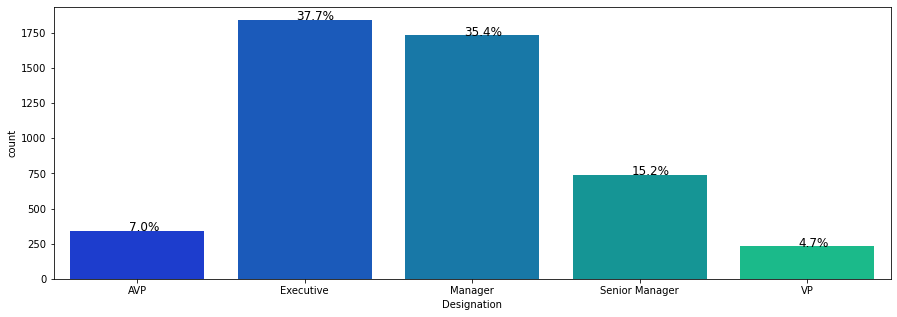

In [29]:
plt.figure(figsize=(15,5))
ax = sns.countplot(df['Designation'],palette='winter')
perc_on_bar(ax,df['Designation'])

- Most of the people are in Executives, Managers, Senior Managers positions
- There is a small amount of VPs and AVPs

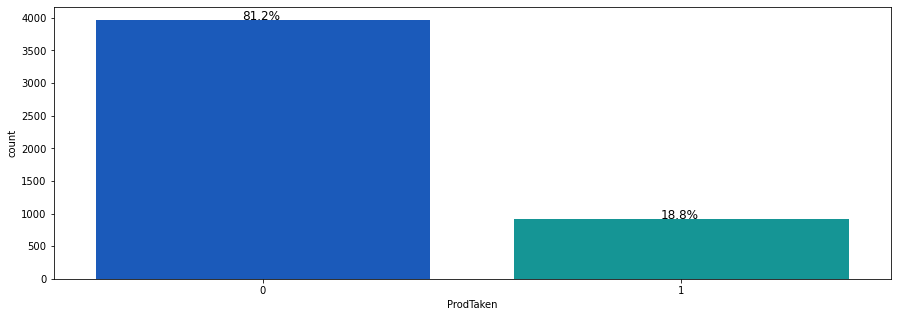

In [30]:

plt.figure(figsize=(15,5))
ax = sns.countplot(df['ProdTaken'],palette='winter')
perc_on_bar(ax,df['ProdTaken'])

**Observations**
- Only 18.8 percent of people took a product
- There is imbalance in y

### Observations on Age

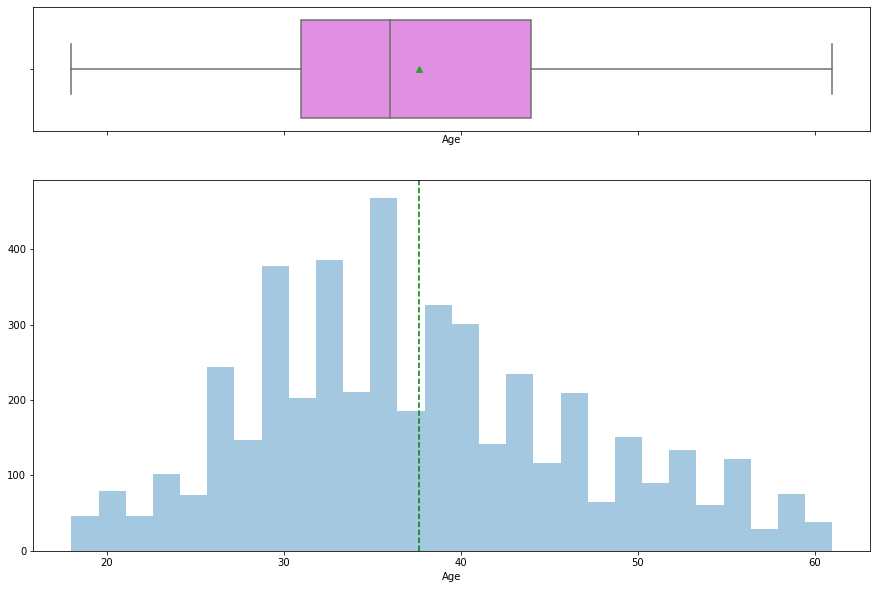

In [31]:
histogram_boxplot(df['Age'])

**Observations**

- Age seems to be uniformly distributed
- most of the people are in the range 30-40 years old

### Observations on duration of pitch

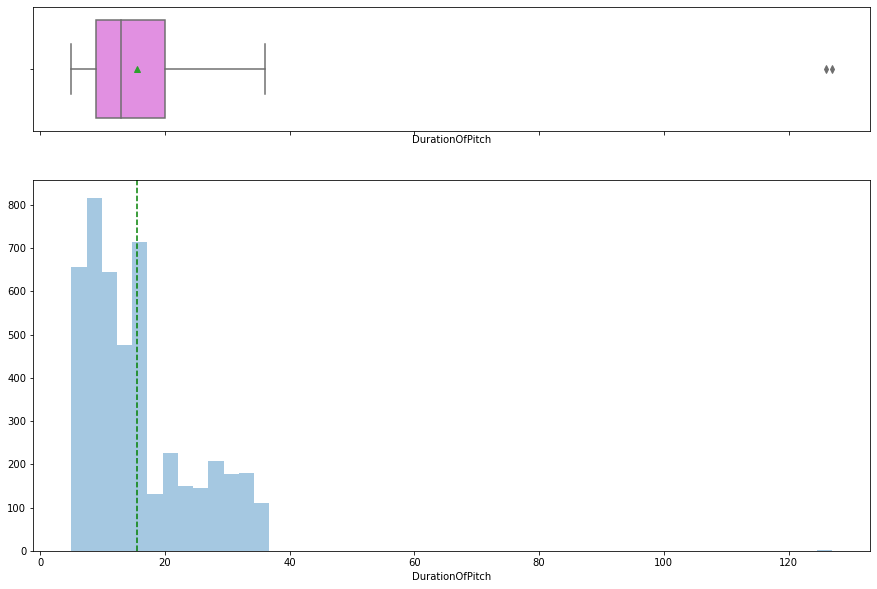

In [32]:
histogram_boxplot(df['DurationOfPitch'])

**Observations**
- Most of the pitches lasted from 5 to 20 minutes

### Observations on number of persons visiting

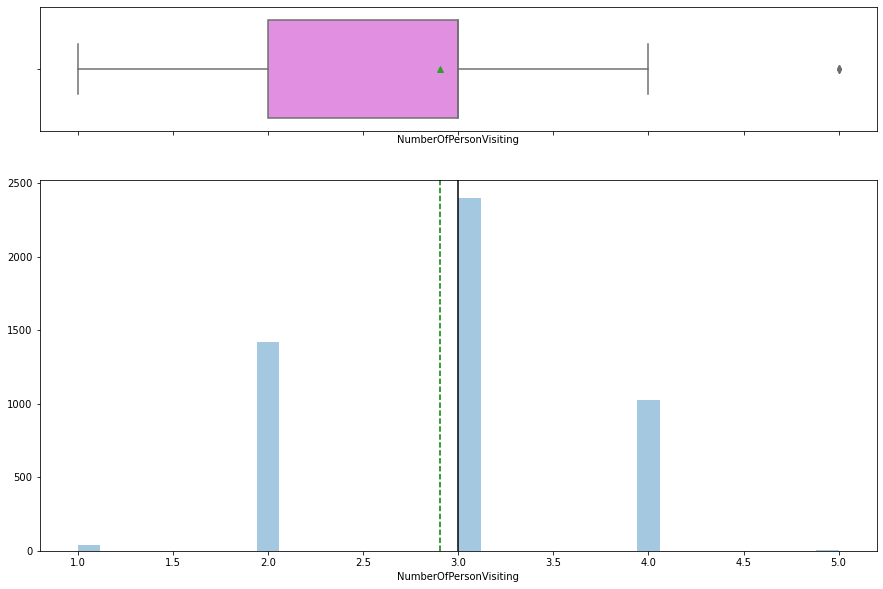

In [33]:
histogram_boxplot(df['NumberOfPersonVisiting'])

**Observations**
- Most of the groups were of 3 people

### Observations on number of followups

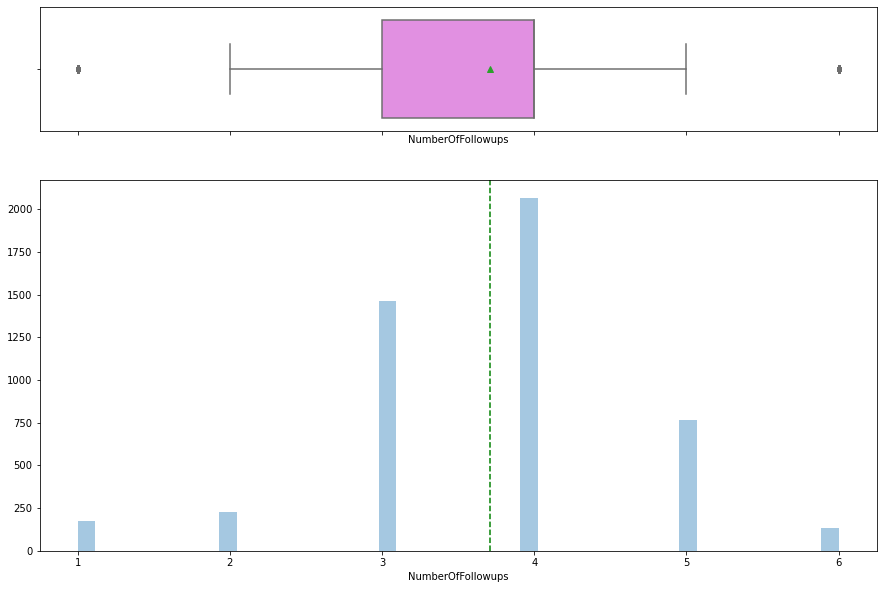

In [34]:
histogram_boxplot(df['NumberOfFollowups'])

- Most people had 3 to 4 followups

### Observations on preferred property star

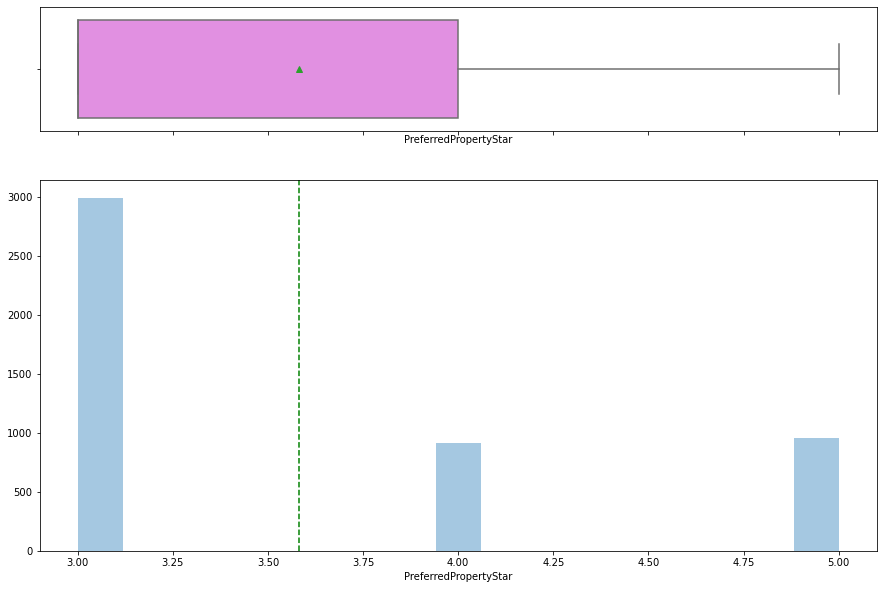

In [35]:
histogram_boxplot(df['PreferredPropertyStar'])

- Most of people preferred 3 star hotels

### Observations on number of trips

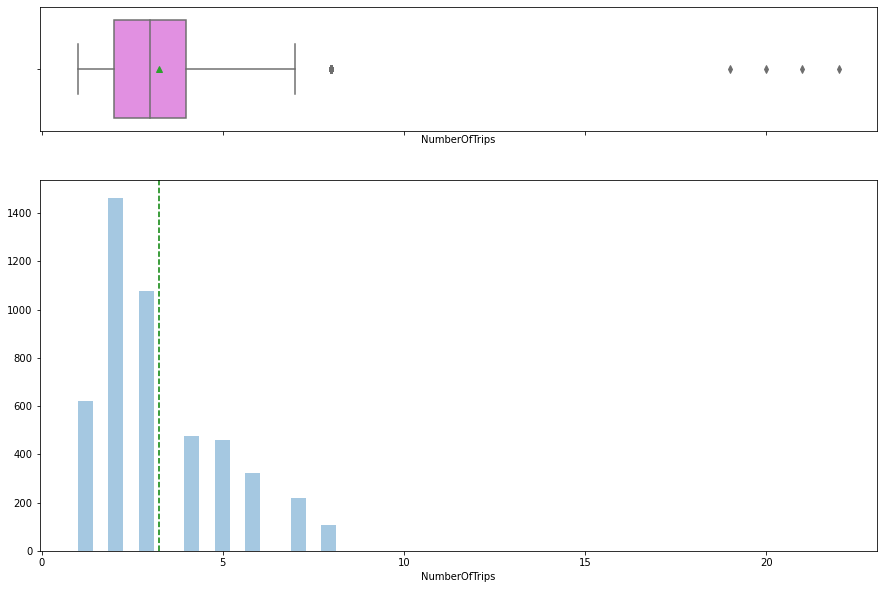

In [36]:
histogram_boxplot(df['NumberOfTrips'])

- Most people make 1-3 trips on average every year

### Observations on Pitch Satisfaction Score

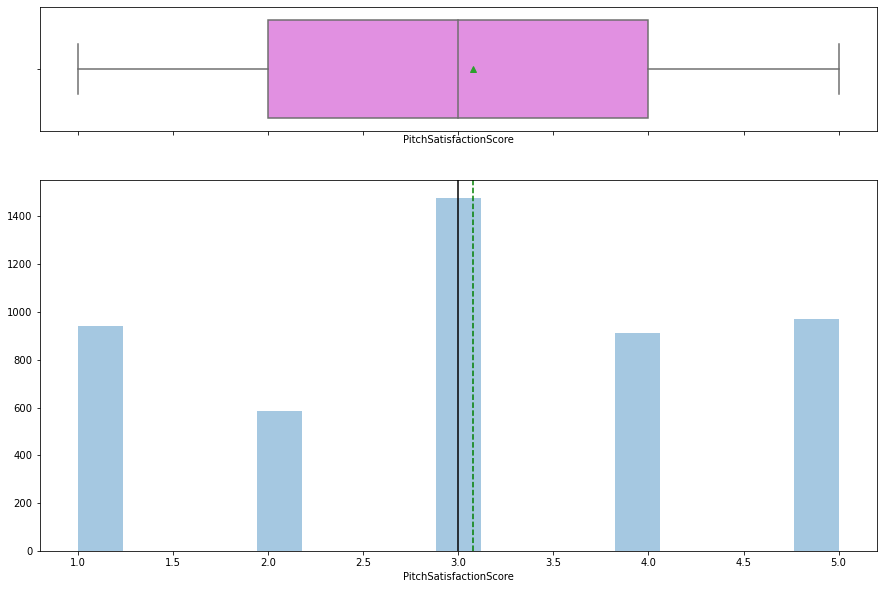

In [37]:
histogram_boxplot(df['PitchSatisfactionScore'])

- Most people gave a score of 3 on the pitch, there's a considerable amount of 1's and 5's

### Observations on number of number of children visiting

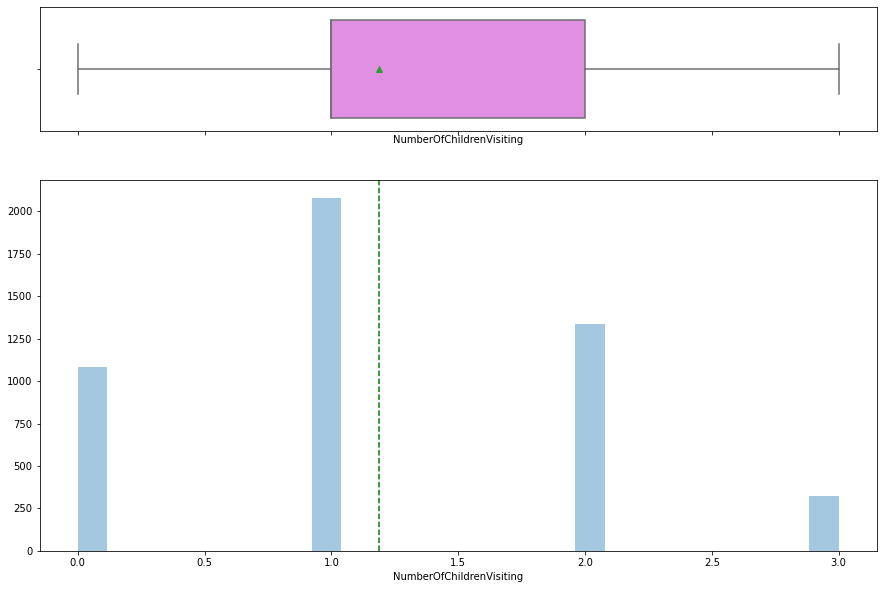

In [38]:
histogram_boxplot(df['NumberOfChildrenVisiting'])

- Most people bring 1 child

### Observations on monthly income

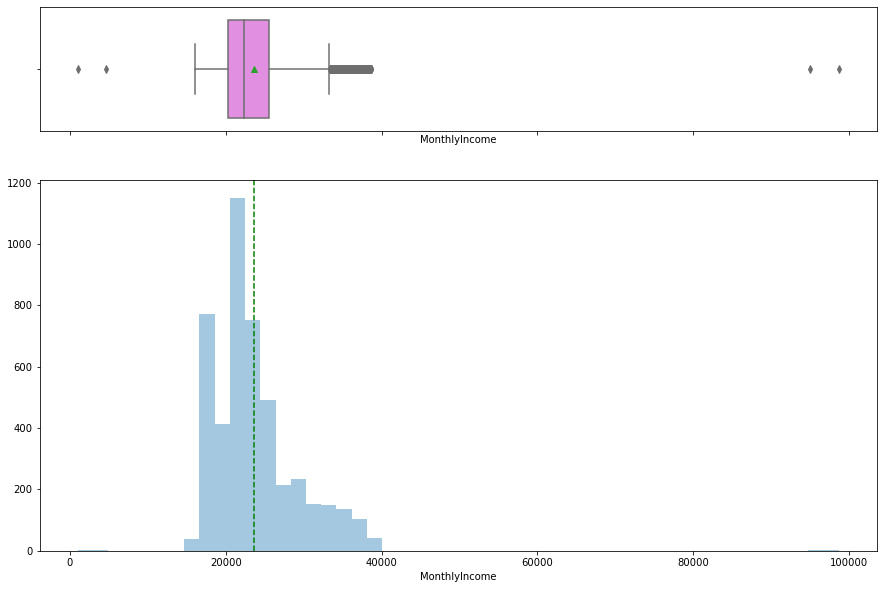

In [39]:
histogram_boxplot(df['MonthlyIncome'])

- A clear candidate for outlier treatment

## Bivariate Analysis

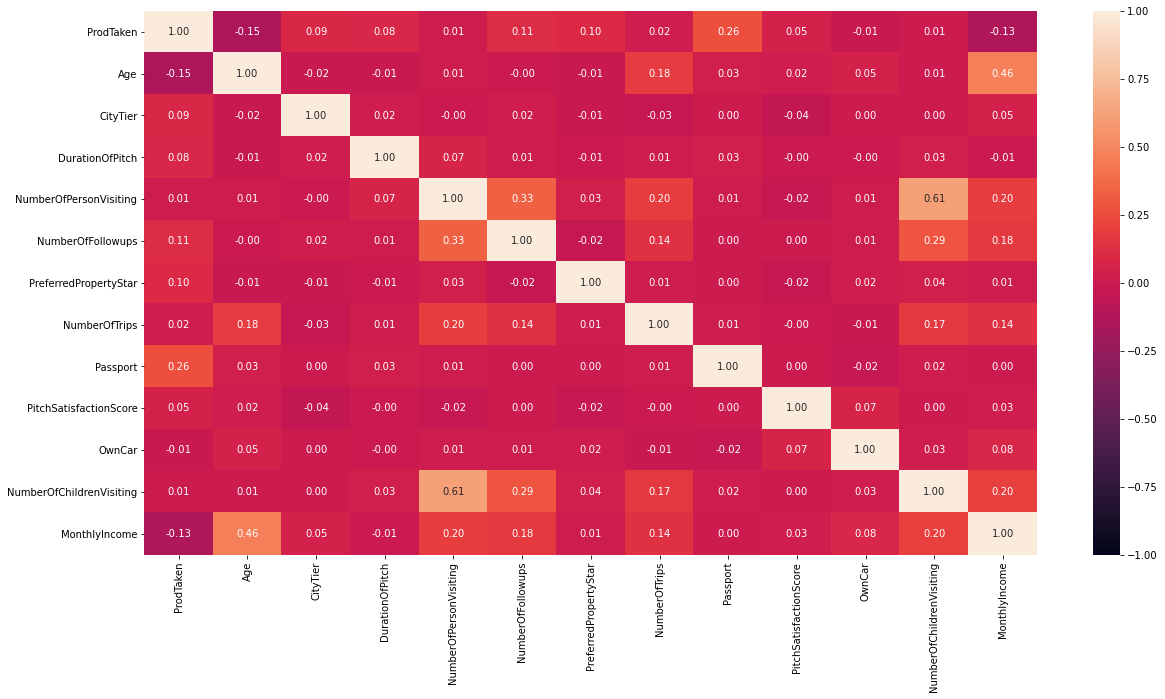

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

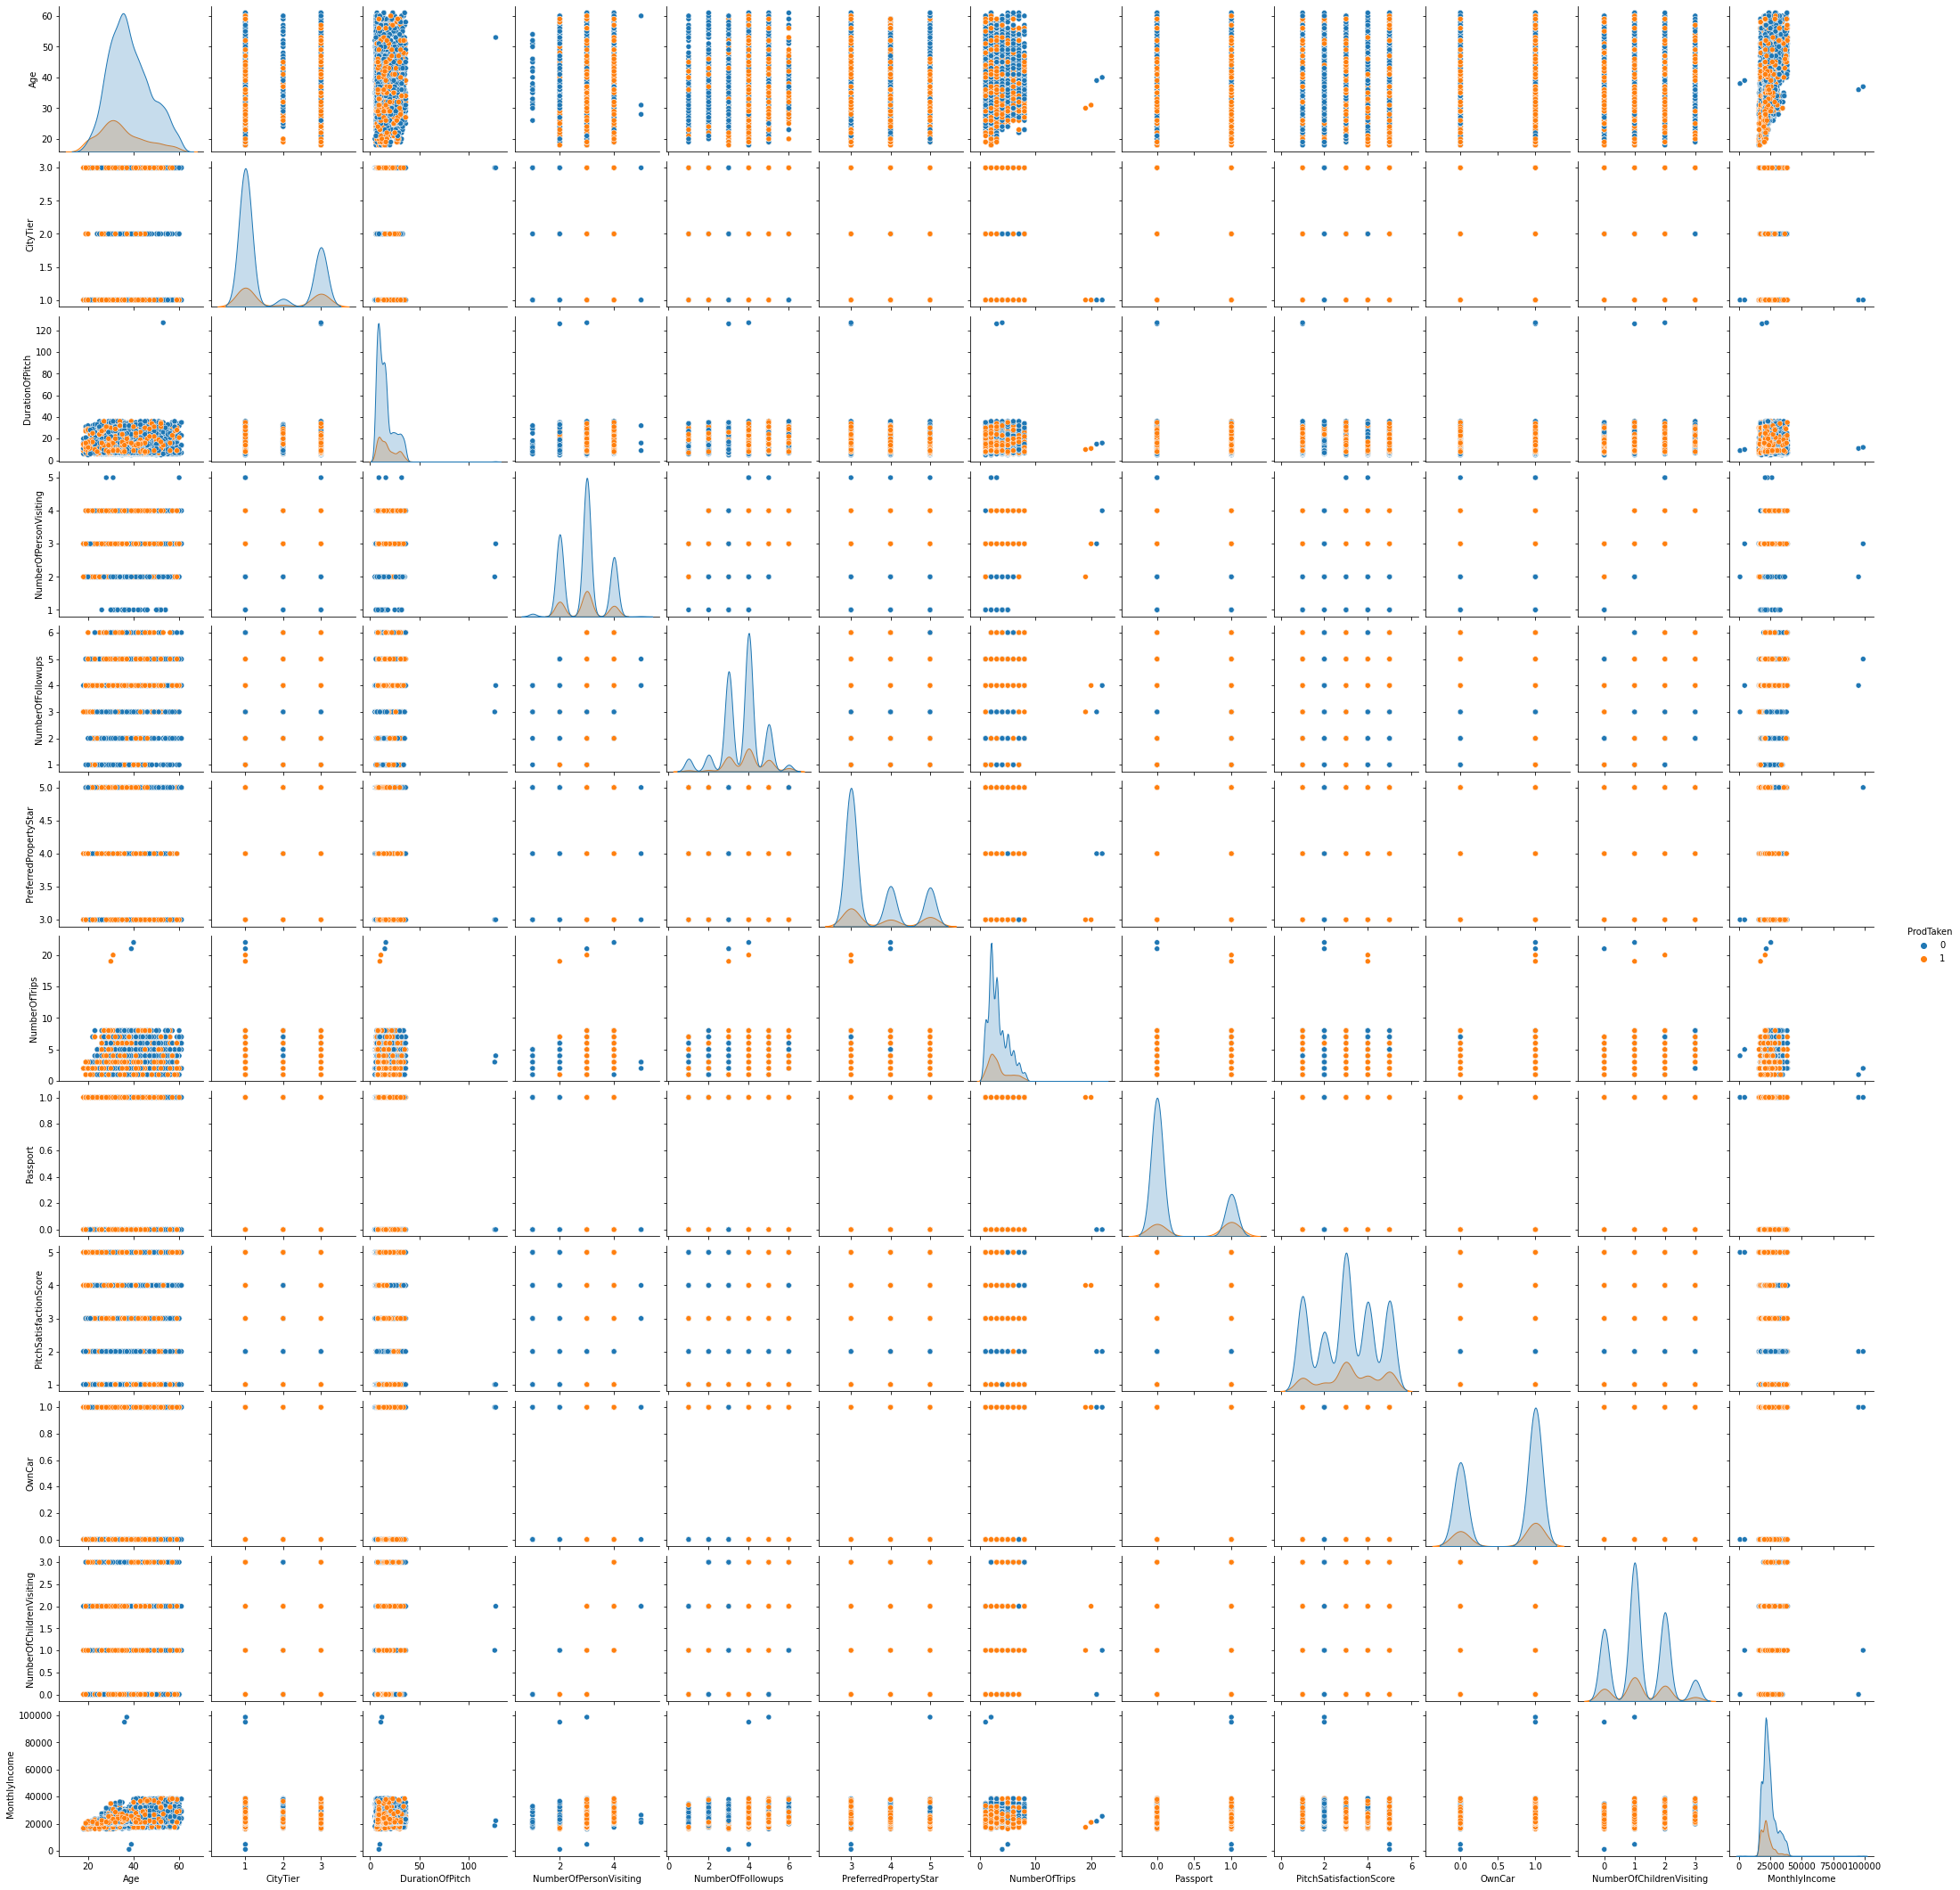

In [41]:
sns.pairplot(df,hue='ProdTaken')
plt.show()

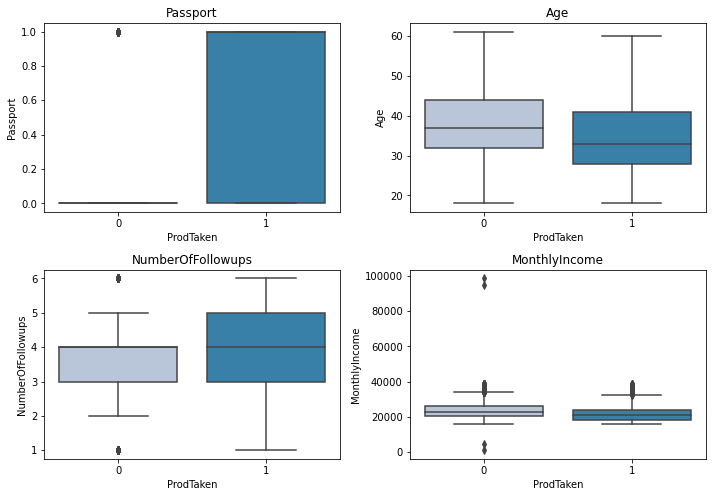

In [42]:
cols = df[['Passport', 'Age', 'NumberOfFollowups', 'MonthlyIncome']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df["ProdTaken"],df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [43]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

In [44]:
df.dtypes

ProdTaken                      int64
Age                          float64
TypeofContact               category
CityTier                       int64
DurationOfPitch              float64
Occupation                  category
Gender                      category
NumberOfPersonVisiting         int64
NumberOfFollowups            float64
ProductPitched              category
PreferredPropertyStar        float64
MaritalStatus               category
NumberOfTrips                float64
Passport                       int64
PitchSatisfactionScore         int64
OwnCar                         int64
NumberOfChildrenVisiting     float64
Designation                 category
MonthlyIncome                float64
dtype: object

### Distribution of categorical values against ProdTaken variable

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2837  607  3444
All              3946  917  4863
------------------------------------------------------------------------------------------------------------------------


<Figure size 720x720 with 0 Axes>

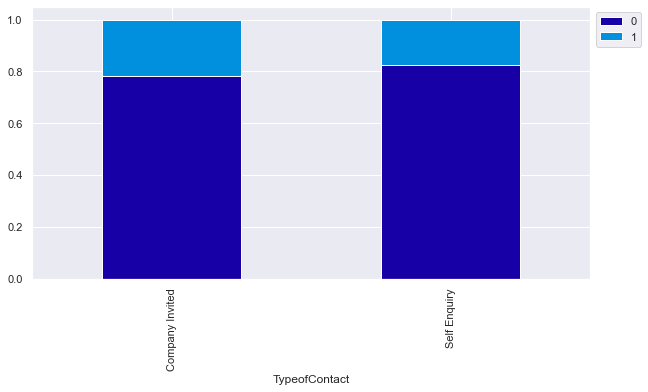

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


<Figure size 720x720 with 0 Axes>

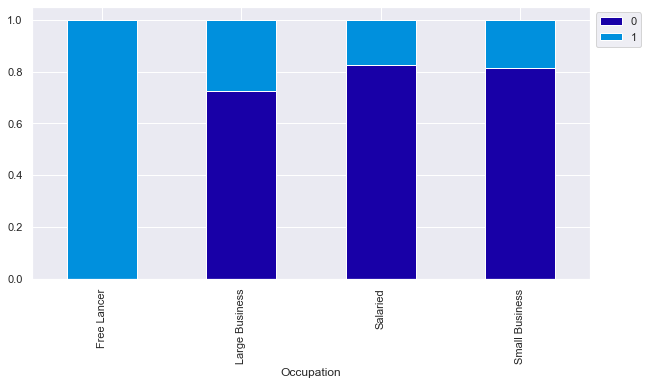

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


<Figure size 720x720 with 0 Axes>

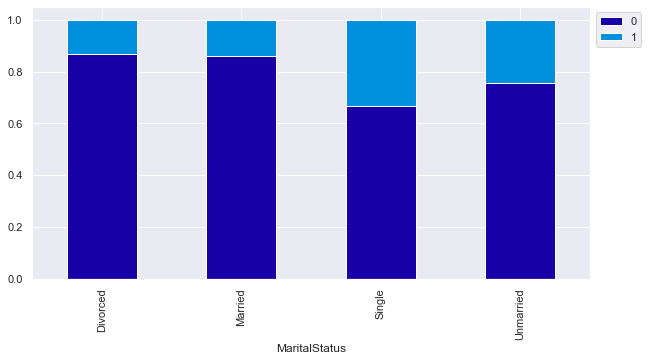

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


<Figure size 720x720 with 0 Axes>

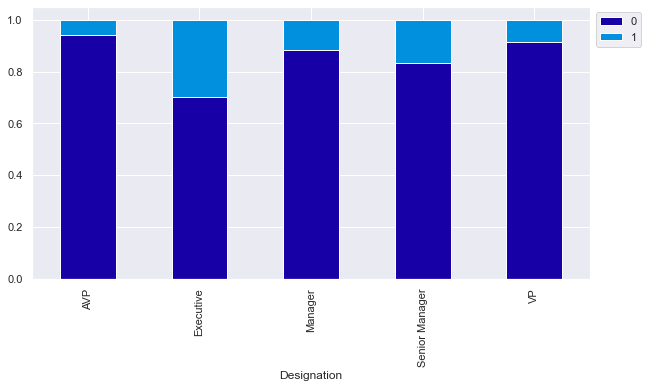

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


<Figure size 720x720 with 0 Axes>

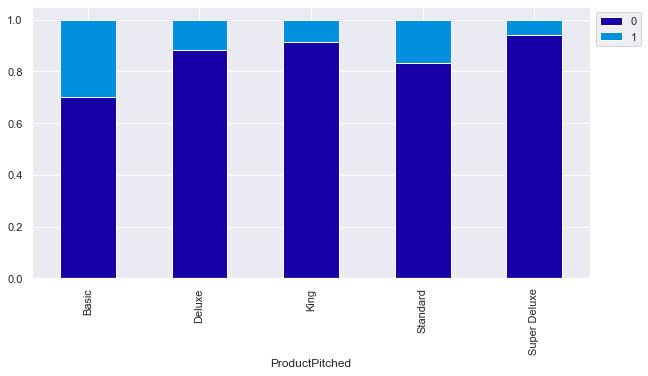

In [45]:
cols = ["TypeofContact", "Occupation", "MaritalStatus", "Designation", "ProductPitched"];
for col in cols:
    plt.figure(figsize=(10,10))
    stacked_plot(df[col]);
    plt.show()
    

**Observations**
- Among the people who took a product, there are a lot of freelancers
- Executives tend to take more products
- Basic packages were bought mostly

## Feature Engineering

### Data Preprocessing

I will first create dummies for the Gender column values. Then I'm going to add the values in Gender column that are classified as 'Fe Male' and 'Female' and put the result into a new column called 'Gender_FemaleNew'. After that I will get rid of the two redundant columns.  

In [46]:
#df['FemaleNew'] = df["Fe Male"] + df["Female"]
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [47]:
df = pd.get_dummies(df, columns=['Gender'])

In [48]:
df["Gender_FemaleNew"] = df["Gender_Fe Male"] + df["Gender_Female"]

In [49]:
df.drop(["Gender_Fe Male", "Gender_Female"], axis = 1, inplace = True);

In [50]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Gender_Male,Gender_FemaleNew
0,1,41.0,Self Enquiry,3,6.0,Salaried,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,0,1
1,0,49.0,Company Invited,1,14.0,Salaried,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,1,0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,1,0
3,0,33.0,Company Invited,1,9.0,Salaried,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,0,1
4,0,NaN,Self Enquiry,1,8.0,Small Business,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,1,0


ProdTaken            0    1   All
Gender_FemaleNew                 
0                 2338  578  2916
1                 1630  342  1972
All               3968  920  4888
------------------------------------------------------------------------------------------------------------------------


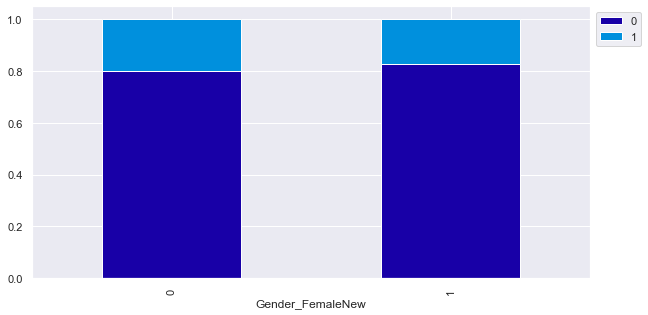

In [51]:
stacked_plot(df["Gender_FemaleNew"])

ProdTaken       0    1   All
Gender_Male                 
0            1630  342  1972
1            2338  578  2916
All          3968  920  4888
------------------------------------------------------------------------------------------------------------------------


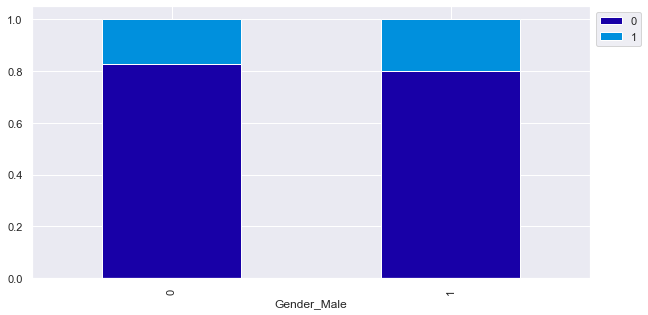

In [52]:
stacked_plot(df["Gender_Male"])

In [53]:
df.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
CityTier                      0
Occupation                    0
NumberOfPersonVisiting        0
Gender_FemaleNew              0
ProductPitched                0
Gender_Male                   0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
Designation                   0
ProdTaken                     0
dtype: int64

- As you can see, there are no null values in the Gender_Male and Gender_FemaleNew columns

### Replace null values with "Undefined" category in the TypeofContact feature

In [54]:
df["TypeofContact"] = df['TypeofContact'].cat.add_categories('Unknown')
df["TypeofContact"].fillna('Unknown', inplace =True)


In [55]:
df.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                 0
CityTier                      0
Occupation                    0
NumberOfPersonVisiting        0
Gender_FemaleNew              0
ProductPitched                0
Gender_Male                   0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
Designation                   0
ProdTaken                     0
dtype: int64

### Replace null values with median in numerical columns

In [56]:
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(), inplace =True)

In [57]:
df.isnull().sum().sort_values(ascending=False)

MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
NumberOfPersonVisiting        0
Gender_FemaleNew              0
ProductPitched                0
Gender_Male                   0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
Designation                   0
ProdTaken                     0
dtype: int64

In [58]:
df['PreferredPropertyStar'].median()

3.0

In [59]:
null_cols = ['NumberOfTrips', 'NumberOfChildrenVisiting', 'PreferredPropertyStar', 'NumberOfFollowups', 'NumberOfTrips', 'Age']
for ncol in null_cols:
    df[ncol].fillna(df[ncol].median(), inplace =True)

In [60]:
df.isnull().sum().sort_values(ascending=False)

MonthlyIncome               233
Gender_FemaleNew              0
ProductPitched                0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
NumberOfPersonVisiting        0
NumberOfFollowups             0
PreferredPropertyStar         0
Gender_Male                   0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
ProdTaken                     0
dtype: int64

### Outlier treatment

From the section on univariate analysis, it was clear that we have one columns: MonthlyIncome that have significant amount of outliers. We shall deal with those outliers by substituting them by upper whisker value.

In [61]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return data

In [62]:
df = treat_outliers(df,'MonthlyIncome')

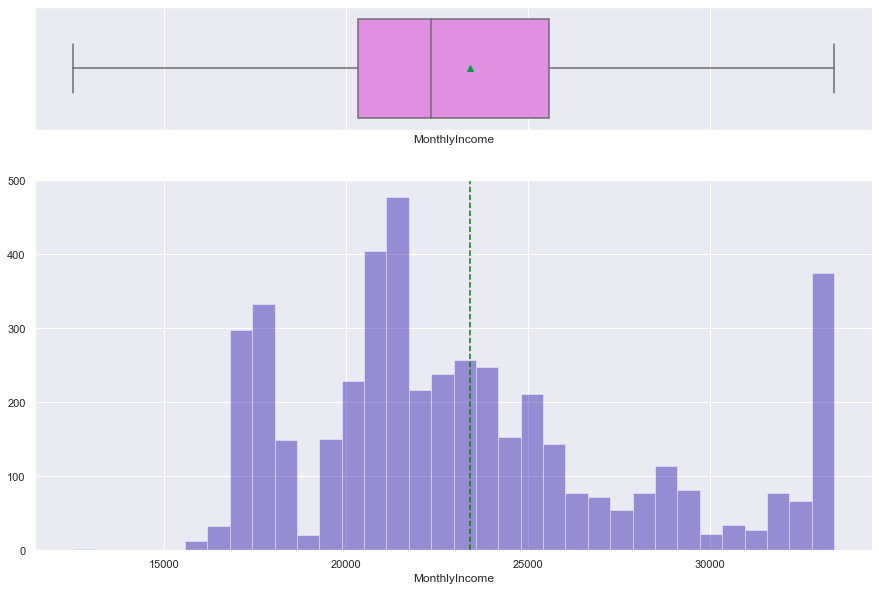

In [63]:
histogram_boxplot(df['MonthlyIncome'])

In [64]:
df['MonthlyIncome'].median()

22347.0

In [65]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace =True)

In [66]:
df.isnull().sum().sort_values(ascending=False)

Gender_FemaleNew            0
Gender_Male                 0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

In [67]:
df = treat_outliers(df,'NumberOfTrips')

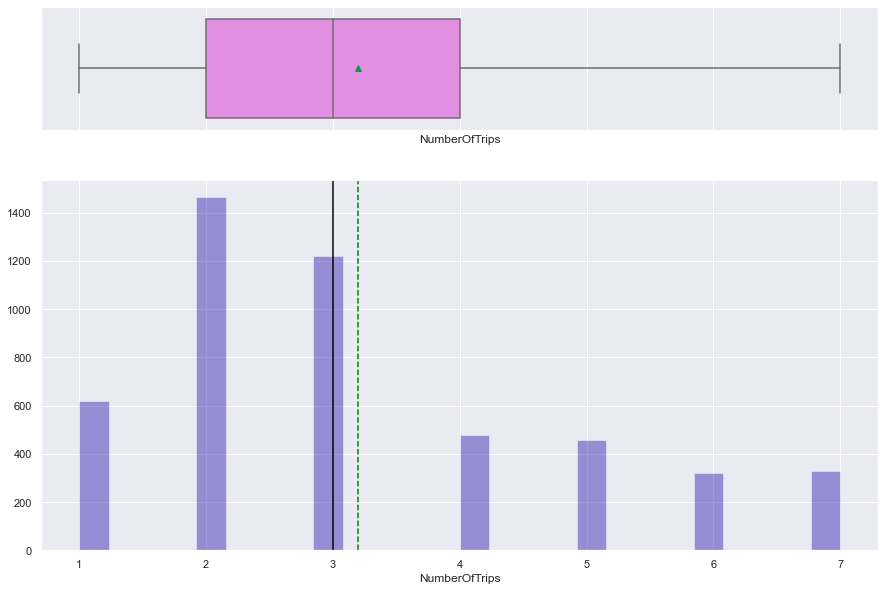

In [68]:
histogram_boxplot(df['NumberOfTrips'])

In [69]:
 x = df.stack()

In [70]:
print(pd.Categorical(x[x!=0].index.get_level_values(1)))

['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', ..., 'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome', 'Gender_Male']
Length: 82500
Categories (20, object): ['Age', 'CityTier', 'Designation', 'DurationOfPitch', ..., 'PreferredPropertyStar', 'ProdTaken', 'ProductPitched', 'TypeofContact']


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   NumberOfPersonVisiting    4888 non-null   int64   
 7   NumberOfFollowups         4888 non-null   float64 
 8   ProductPitched            4888 non-null   category
 9   PreferredPropertyStar     4888 non-null   float64 
 10  MaritalStatus             4888 non-null   category
 11  NumberOfTrips             4888 non-null   float64 
 12  Passport                  4888 non-null   int64   
 13  PitchSatisfactionScore    4888 non-null   int64 

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

## Split Data


In [72]:
X = df.drop(['ProdTaken'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['ProdTaken']#.apply(lambda x : 1 if x=='Yes' else 0)

In [73]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3421, 30) (1467, 30)


In [74]:
y.value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [75]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

In [76]:
y.dtype

dtype('int64')

In [77]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [78]:
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [79]:
dtree=DecisionTreeClassifier(random_state=1)

In [80]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

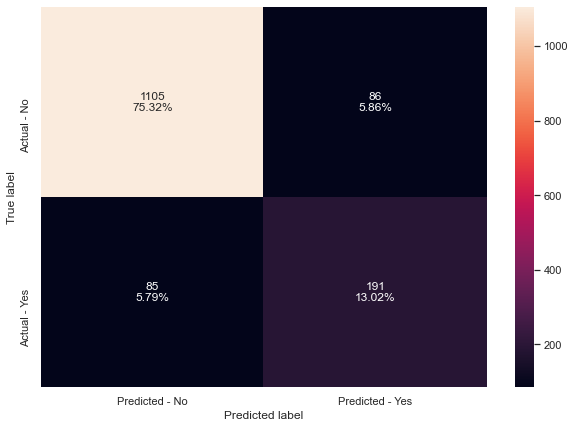

In [81]:
make_confusion_matrix(dtree,y_test)

In [131]:
dtree_score = get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8834355828220859
Recall on training set :  1.0
Recall on test set :  0.6920289855072463
Precision on training set :  1.0
Precision on test set :  0.6895306859205776
F1-Score on training set :  1.0
F1-Score on test set :  0.6907775768535263


**Observations**
- The decision tree classifier is overfitting on training data. We have excellent scores of 1 on training set and extremely poor performance on testing data.
- Accuracy  on test data - 88%, which is not too bad. Recall and Precision on test data are also low - in the area of 69%

#### Hyperparameter Tuning

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [107]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=18,
                       random_state=1)

In [121]:
dtree_tuned_score = get_model_score(dtree_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.8841172460804363
Recall on training set :  1.0
Recall on test set :  0.6811594202898551
Precision on training set :  1.0
Precision on test set :  0.6962962962962963


In [ ]:
make_confusion_matrix(dtree_tuned,y_test)

- The tuned decision tree classifier only gives slight improvement on accuracy, recall and precision stay the same
- The best hyperparameters chosen are max_depth = 18 and weight classes given to 0 are 18% and to 1 - 72%
- The tree is still overfitting

### Random Forest

Accuracy on training set :  1.0
Accuracy on test set :  0.9141104294478528
Recall on training set :  1.0
Recall on test set :  0.5833333333333334
Precision on training set :  1.0
Precision on test set :  0.936046511627907
F1-Score on training set :  1.0
F1-Score on test set :  0.7187500000000001


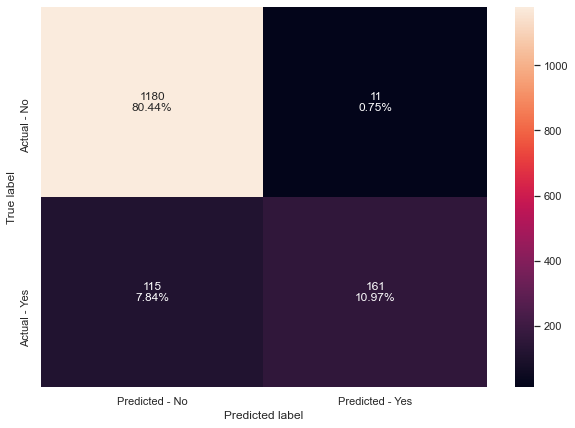

In [98]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

* Random Forest has performed well in terms of accuracy and precision, but it is not able to generalize well on the test data in terms of recall.
* We are still getting 1's on training set, which means that we are overfitting and including the noise 

Let's give weights to classes

**Random forest with class weights**

In [125]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

Accuracy on training set :  1.0
Accuracy on test set :  0.9100204498977505
Recall on training set :  1.0
Recall on test set :  0.5543478260869565
Precision on training set :  1.0
Precision on test set :  0.9444444444444444
F1-Score on training set :  1.0
F1-Score on test set :  0.6986301369863014


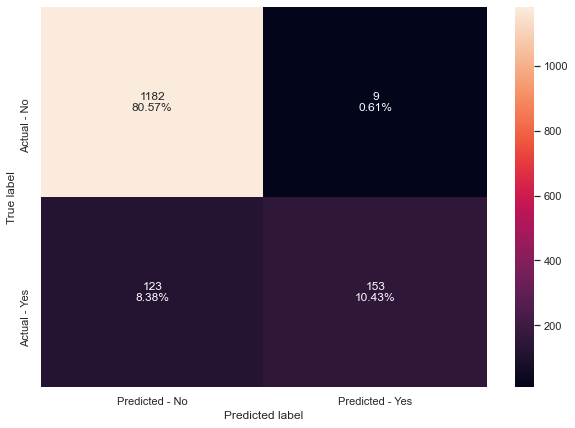

In [126]:
#Calculating different metrics
get_metrics_score(rf_wt)

#Creating confusion matrix
make_confusion_matrix(rf_wt,y_test)

**Observations**

- Precision and accuracy on test set have slightly improved when we added weight classes to random forest
- We are still overfitting, let's try tuning some hyperparameters, like max_depth, max_features, min_samples_leaf, min_samples_split and n_estimators. The parameters will be stored in an object as arrays and the best ones will be chosen by the grid search

#### Hyperparameter Tuning

In [92]:
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=20,
                       max_features='sqrt', min_samples_split=12,
                       n_estimators=50, oob_score=True, random_state=1)

In [129]:
get_metrics_score(rf_tuned)

Accuracy on training set :  0.9739842151417714
Accuracy on test set :  0.9025221540558964
Recall on training set :  0.9767080745341615
Recall on test set :  0.6739130434782609
Precision on training set :  0.8947368421052632
Precision on test set :  0.7782426778242678
F1-Score on training set :  0.9339272457312546
F1-Score on test set :  0.7223300970873786


[0.9739842151417714,
 0.9025221540558964,
 0.9767080745341615,
 0.6739130434782609,
 0.8947368421052632,
 0.7782426778242678,
 0.9339272457312546,
 0.7223300970873786]

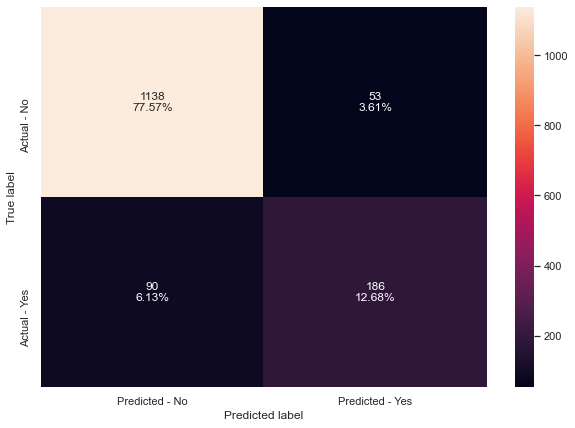

In [130]:
make_confusion_matrix(rf_tuned,y_test)

**Observations**
- The tuned random forest gave much better performance, the accuracy on trainig and test sets is closer to each other, meaning that the model is not overfitting by much, the recall has improved, now comprising 67%, f1 score increased to 72% on test data, but precision has decreased.
- The hyperparameters chosen for best fit are: max_depth=20,max_features='sqrt', min_samples_split=12, n_estimators=50
- Out of all the random forest models the tuned one gives best performance

### Bagging Classifier

In [101]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

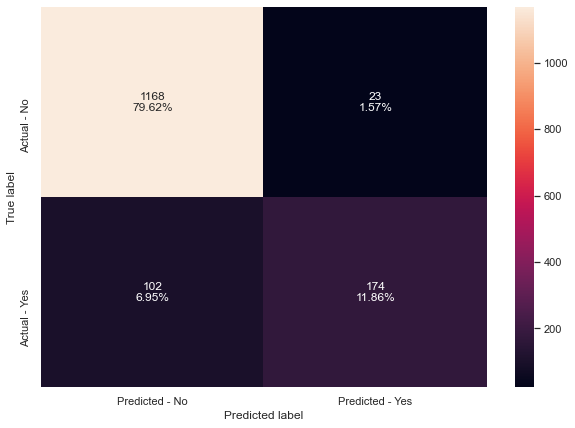

In [134]:
make_confusion_matrix(bagging,y_test)

In [135]:
get_metrics_score(bagging)

Accuracy on training set :  0.994153756211634
Accuracy on test set :  0.9147920927062031
Recall on training set :  0.9704968944099379
Recall on test set :  0.6304347826086957
Precision on training set :  0.9984025559105432
Precision on test set :  0.883248730964467
F1-Score on training set :  0.984251968503937
F1-Score on test set :  0.7357293868921776


[0.994153756211634,
 0.9147920927062031,
 0.9704968944099379,
 0.6304347826086957,
 0.9984025559105432,
 0.883248730964467,
 0.984251968503937,
 0.7357293868921776]

- The bagging classifier gave better performance compared to tuned random forest in terms of f1 score, precision, and accuracy, but recall decreased.

Let's tune the class_weights hyperparameter and see if we can improve the model

In [136]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        random_state=1),
                  random_state=1)

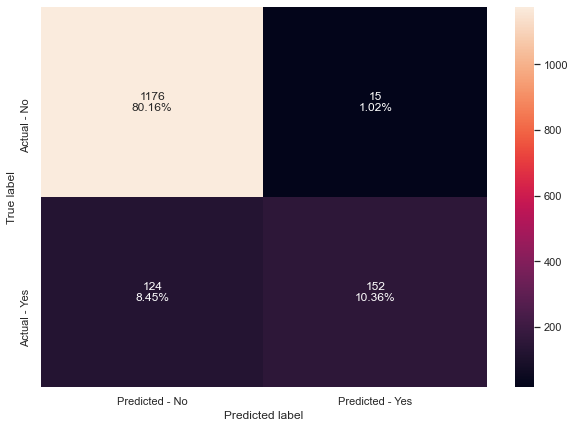

In [137]:
make_confusion_matrix(bagging_wt,y_test)

In [138]:
wt_bagging_acc = get_metrics_score(bagging_wt)

Accuracy on training set :  0.9950306927798889
Accuracy on test set :  0.9052488070892979
Recall on training set :  0.9782608695652174
Recall on test set :  0.5507246376811594
Precision on training set :  0.995260663507109
Precision on test set :  0.9101796407185628
F1-Score on training set :  0.9866875489428347
F1-Score on test set :  0.6862302483069977


- f1 score and recall have decreased, I think we are doing worse than before. Let's tune some other parameters, like max_samples, max_features and n_estimators, we will try them sequentially by putting various values into arrays and letting the grid search decide which ones fit best

#### Hyperparameter tuning

In [103]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

Accuracy on training set :  1.0
Accuracy on test set :  0.9263803680981595
Recall on training set :  1.0
Recall on test set :  0.6594202898550725
Precision on training set :  1.0
Precision on test set :  0.9285714285714286
F1-Score on training set :  1.0
F1-Score on test set :  0.7711864406779662


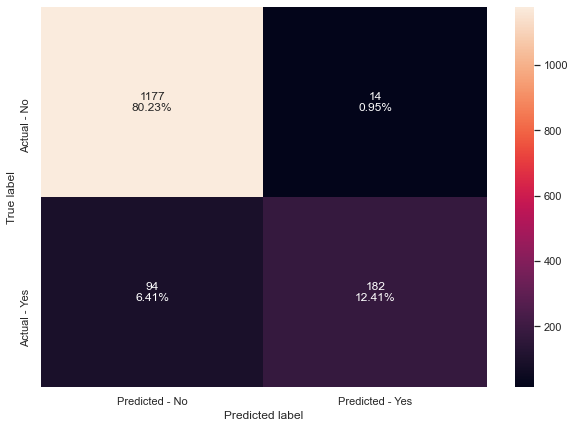

In [140]:
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

**Observation**
- We have 1's on training data, which means we are overfitting, but the accuracy and precision are really high on the test data. Recall has slightly increased, compared to bagging classifier, and considerably when compared to weighted bagging classifier
- The hyperparameters chosen for best fit model are: max_features=0.9, max_samples=0.9, n_estimators=50
- Let's now try boosting models.

## AdaBoost Classifier

Accuracy on training set :  0.8459514761765565
Accuracy on test set :  0.847307430129516
Recall on training set :  0.32298136645962733
Recall on test set :  0.32608695652173914
Precision on training set :  0.6956521739130435
Precision on test set :  0.703125
F1-Score on training set :  0.44114528101802764
F1-Score on test set :  0.4455445544554455


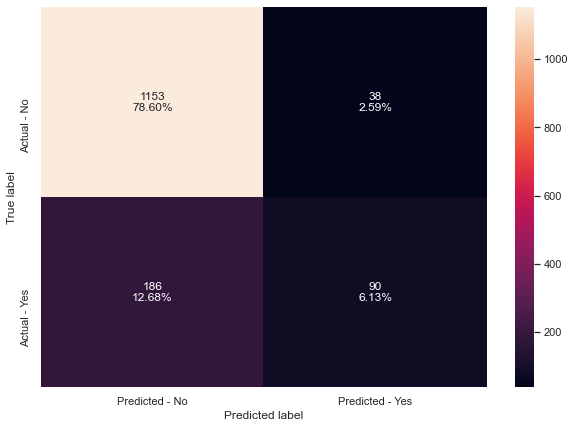

In [105]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

**Observation**
- The good news is that the model is not overfitting, however, we are getting horrible performance in terms of recall - only 32% on both training and test sets.

Let's see if we can tune some hyperparameters: we will try the decision tree for base_estimator with three different max_depth parameters: 1, 2, and 3. We will also try different values for n_estimators and the learning_rate hyperparameters and let grid search choose the best hyperparameters 

### Hyperparameter Tuning

In [82]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.3000000000000003, n_estimators=100,
                   random_state=1)

Accuracy on training set :  0.9950306927798889
Accuracy on test set :  0.8882072256305386
Recall on training set :  0.9782608695652174
Recall on test set :  0.6304347826086957
Precision on training set :  0.995260663507109
Precision on test set :  0.7372881355932204
F1-Score on training set :  0.9866875489428347
F1-Score on test set :  0.6796875000000001


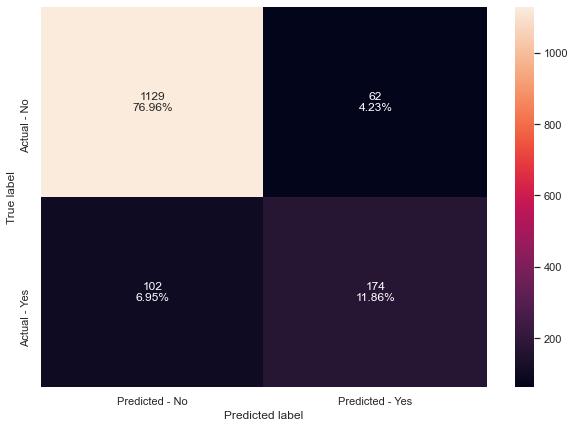

In [83]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

**Observations**
* All of the performance metrics have increased, but the recall and f1 scores on test set are still considerably low. They are, however, on the same level of values that other models have shown.
* The hyperparameters chosen by the grid search are: max_depth=3, learning_rate=1.3000000000000003, n_estimators=100
* There is definitely still room for improvement for recall precision and f1 score values

## Gradient Boosting Classifier

Accuracy on training set :  0.8862905583162818
Accuracy on test set :  0.8698023176550784
Recall on training set :  0.4503105590062112
Recall on test set :  0.39855072463768115
Precision on training set :  0.8923076923076924
Precision on test set :  0.8148148148148148
F1-Score on training set :  0.5985552115583076
F1-Score on test set :  0.5352798053527981


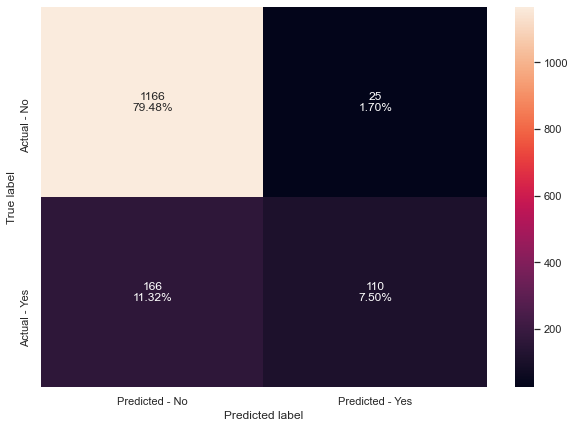

In [84]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

**Observations**
* Accuracy and Precision scores are good, but recall (39% on test set) and f1 (53% on test set) are very low and might be improved by hyperparameter tuning 

### Hyperparameter Tuning


I will feed different values for n_estimators, subsample and max_features to the grid search and let it decide which ones fit best

In [85]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.9)

Accuracy on training set :  0.9216603332358959
Accuracy on test set :  0.8916155419222904
Recall on training set :  0.6257763975155279
Recall on test set :  0.5217391304347826
Precision on training set :  0.9372093023255814
Precision on test set :  0.8421052631578947
F1-Score on training set :  0.7504655493482308
F1-Score on test set :  0.6442953020134228


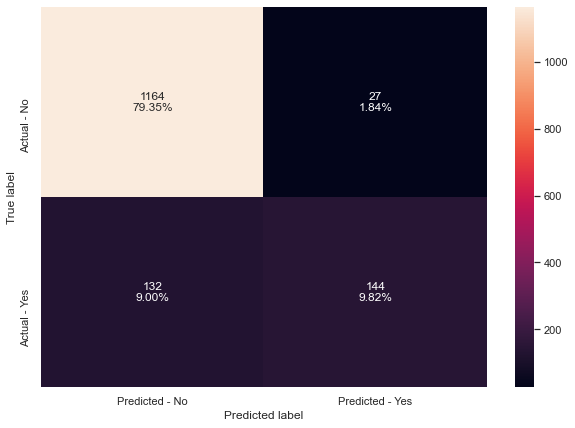

In [86]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

**Observations**
- Recall is doing much better now, but the score on test data is still low, around 52%. f1 score has also improved considerably thanks to hyperparameter tuning. 
- The hyperparameters chosen for best fit are: max_features=0.7, n_estimators=250, subsample=0.9
- There is still room for improvement in recall and f1 scores.

Let us try XG Boost classifier

## XGBoost Classifier

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9222903885480572
Recall on training set :  0.9968944099378882
Recall on test set :  0.677536231884058
Precision on training set :  1.0
Precision on test set :  0.8820754716981132
F1-Score on training set :  0.9984447900466563
F1-Score on test set :  0.766393442622951


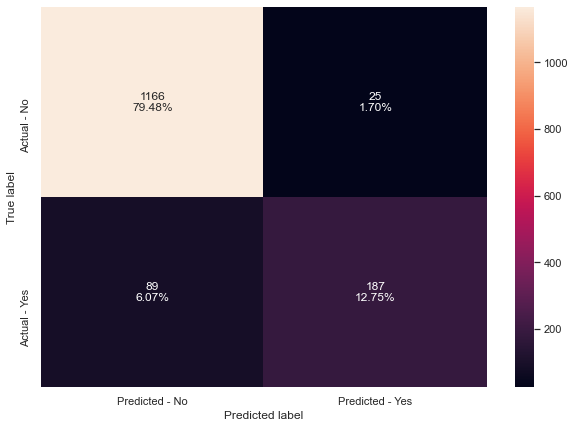

In [87]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

- Of all the models, xg boost gives the best performance without the need to tune the hyperparameters. I would be satisfied with the scores displayed by the model, but still, let's give hyperparameter tuning a shot:

### Hyperparameter Tuning


I will choose logloss as the evaluation metric and feed different values to n_estimators, scale_pos_weight, subsample, learning rate, colsample_by_tree, and colsample_bylevel hyperparameters

In [88]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy on training set :  0.9733995907629348
Accuracy on test set :  0.8922972051806408
Recall on training set :  0.9875776397515528
Recall on test set :  0.8043478260869565
Precision on training set :  0.8845618915159944
Precision on test set :  0.6809815950920245
F1-Score on training set :  0.9332355099046221
F1-Score on test set :  0.7375415282392025


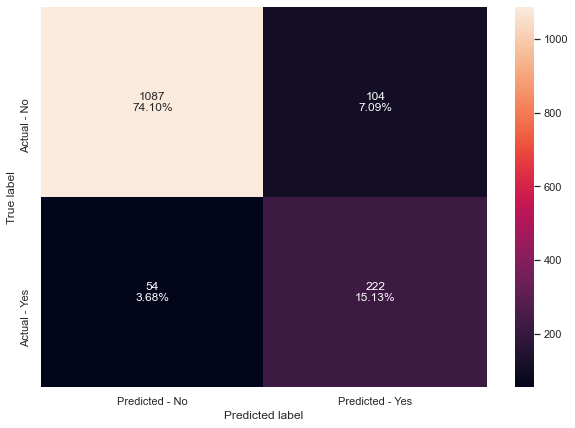

In [89]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

**Observations**
- Test Recall has improved considerably and now comprises 80%, which is the best metric value among all models.
- Test Precision has dropped, but I can live with that. So far, xg boost has the best performance.
- There are a lot of different hyperparameters shown in the model. The ones chosen for best fit are: colsample_bylevel=0.5, colsample_bynode=1, colsample_bytree=1, learning_rate=0.2, subsample=1, scale_pos_weight=5

It is now time to investigate the Stacking Classifier


## Stacking Classifier

In [93]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_tuned)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=20,
                                                       max_features='sqrt',
                                                       min_samples_split=12,
                                                       n_estimators=50,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           n_estimators=250,
                                                 

Accuracy on training set :  0.959953230049693
Accuracy on test set :  0.8847989093387867
Recall on training set :  1.0
Recall on test set :  0.8768115942028986
Precision on training set :  0.8245838668373879
Precision on test set :  0.6419098143236074
F1-Score on training set :  0.903859649122807
F1-Score on test set :  0.7411944869831546


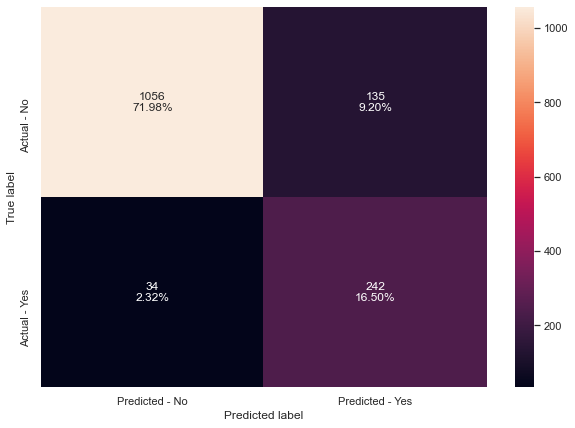

In [94]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

**Observations**
- Very impressive scores, particularly on test recall and accuracy. Precision is still low, but so far, we haven't really looked too much at precision scores. 
- The great performance of the stacked classifier is expected, since it stacks the classifiers and the final classifier is the xg boost, which by itself gave awesome performance metrics.
- As we can see, the stacking classifier took care of all the hyperparameters and it even shows all of the hyperparameters used in the Random Forest Classifier (class_weight={0: 0.18, 1: 0.82}, max_depth=20, max_features='sqrt', min_samples_split=12, n_estimators=50) and the Gradient Boost Classifier (n_estimators=50, learning_rate=0.2, scale_pos_weight=5, subsample=1, etc). The Gradient Boost uses Ada Boosting as init hyperparameter. 

## Comparing all models

In [108]:
# defining list of models
models = [dtree, dtree_tuned, rf_estimator, rf_tuned, bagging,bagging_estimator_tuned,
          ab_classifier, abc_tuned, gb_classifier, gbc_tuned, xgb_classifier,xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [109]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
5,Bagging Classifier Tuned,1.000000,0.926380,1.000000,0.659420,1.000000,0.928571,1.000000,0.771186
10,XGBoost Classifier,0.999415,0.922290,0.996894,0.677536,1.000000,0.882075,0.998445,0.766393
12,Stacking Classifier,0.959953,0.884799,1.000000,0.876812,0.824584,0.641910,0.903860,0.741194
11,Tuned XGBoost Classifier,0.973400,0.892297,0.987578,0.804348,0.884562,0.680982,0.933236,0.737542
4,Bagging Classifier,0.994154,0.914792,0.970497,0.630435,0.998403,0.883249,0.984252,0.735729
3,Tuned Random Forest,0.973984,0.902522,0.976708,0.673913,0.894737,0.778243,0.933927,0.722330
2,Random Forest,1.000000,0.914110,1.000000,0.583333,1.000000,0.936047,1.000000,0.718750
0,Decision Tree,1.000000,0.883436,1.000000,0.692029,1.000000,0.689531,1.000000,0.690778
1,Tuned Decision Tree,1.000000,0.884117,1.000000,0.681159,1.000000,0.696296,1.000000,0.688645
7,Tuned AdaBoost Classifier,0.995031,0.888207,0.978261,0.630435,0.995261,0.737288,0.986688,0.679688


### Feature importance 

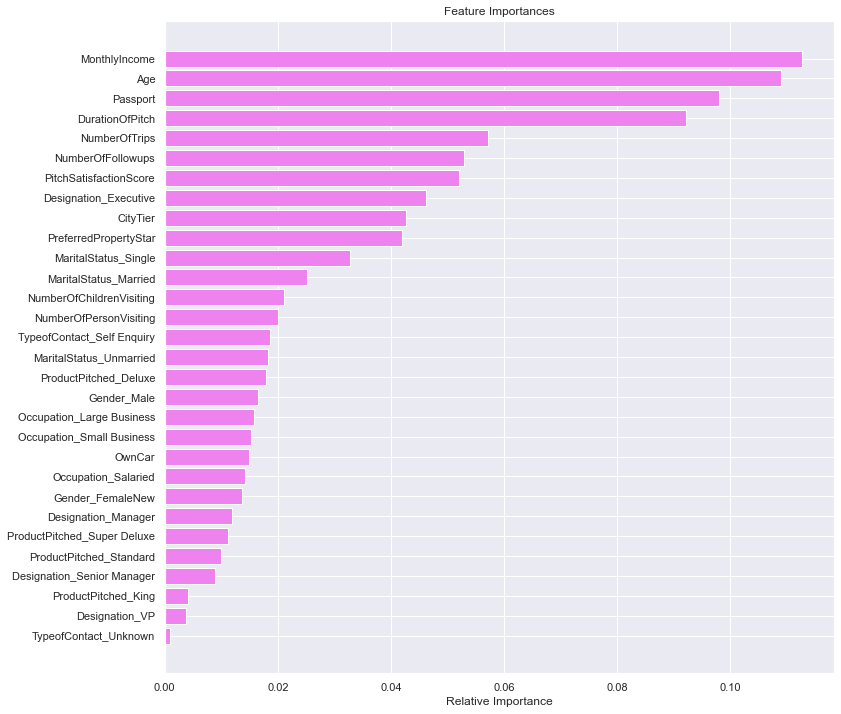

In [95]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Conclusions and Recommendations

- The three best models in terms of f1 score are: Tuned Bagging Classsifier, XG Boost Classifier, and Stacking Classifier
- Tuning the hyperparameters overall increases some of the metric scores, but it can decrease others, and does not necessarily provide the best model, since as we see from the comparison dataframe, the XG Boost Classifier gives better performance in terms of f1 score than the tuned XG Boost Classifier. That is not to say that tuning hyperparameters isn't helpful, it is, it all depends on which metric you want to use for your predictions
- In case of Ada Boosting, for example, tuning the hyperparameters gave dramatic increase to recall and f1 scores. 
- As expected, XG Boost and Stacking Classifier did a very good job on classification. What was not expected is that tuned bagging classifier would outperform them in terms of f1 score.

As for recommendations, I would like to point out the 4 main features that the company should be focusing on when selecting customers who most probably would buy the packages: Monthly income, Age, Passport, and Duration of Pitch. So, obviously the more monthly income means the more the customer is likely to purchase a package. Focus should also be on the age groups of the clients, maybe further research is needed in this area. The interesting part is the duration of pitch. I believe that the company should come up with an optimal duration of pitch. This might require some additional research and surveys, like what would be the ideal period of time that the customer can keep his or her attention span, and how much time is required to go through all of the benefits of a particular travel package.

- 